In [1]:
# @toffanetto

import k_nn_classification as knn 
import matplotlib.pyplot as plt
import numpy as np


/home/toffanetto/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Getting train data
X_train, y_train, classes_rate_train = knn.getData(train=True, raw= False)

Y_data = [X_train, y_train]

# Getting test data
X_test, y_test, classes_rate_test = knn.getData(train=False, raw= False)

Y_test = [X_test, y_test]

In [3]:
k, ba = knn.kFoldValidation(x=X_train, y=y_train, k=4, classes_rate=classes_rate_train)

np.save('../model/knn/processed_data/ba_kfold.npy', ba)
np.save('../model/knn/processed_data/k_kfold.npy', k)

In [57]:
k = np.load('../model/knn/processed_data/k_kfold.npy')

print(k)

ba_avg = [(ba[0][i]+ba[1][i]+ba[2][i]+ba[3][i])/4 for i in range(30)]

print('ba_avg = '+str(ba_avg))

k_optimal = np.argmax(ba_avg)

print('k_optimal = '+str(k_optimal))


[17 28 12 18]
[0.0, 0.8646887006138674, 0.858586072112393, 0.8776704344629149, 0.8765224782775471, 0.8817127262439162, 0.8803909703232335, 0.8836502104965166, 0.8854390114302302, 0.884946646927728, 0.8866557839790226, 0.8848678690380054, 0.8847037166379914, 0.8847872031593553, 0.8859317507694752, 0.8873186942426655, 0.884916793805292, 0.8854506431725302, 0.8856702586698472, 0.8852140537567649, 0.8860640870469361, 0.8852032832457937, 0.8838674477632679, 0.8833829995320766, 0.8825933505330872, 0.8824650868771109, 0.8809222006321226, 0.8818215860858979, 0.8828032114215739, 0.8827576490691925]
15


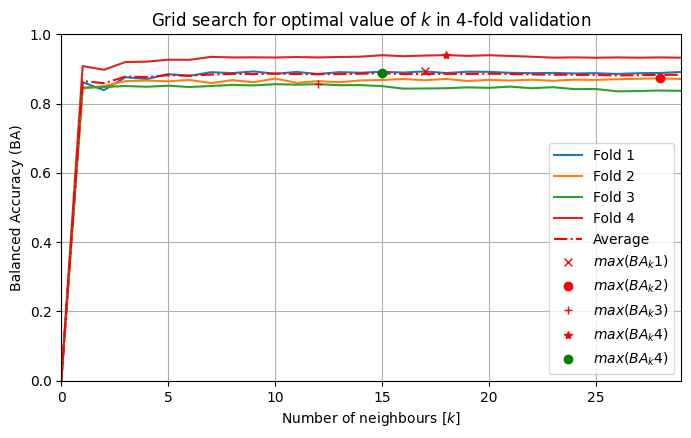

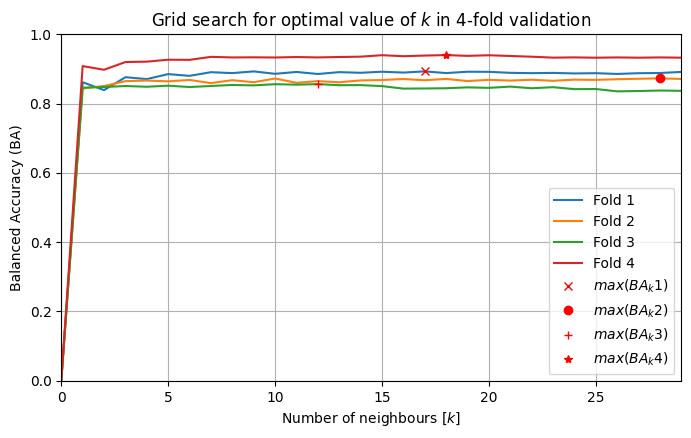

In [58]:
try:
    ba
    k
except:
    ba = np.load('../model/knn/processed_data/ba_kfold.npy')
    k = np.load('../model/knn/processed_data/k_kfold.npy')
    
n = np.linspace(0,29,30)

plt.figure(figsize=(8,4.5))
plt.plot(n,ba[0],label=f'Fold 1')
plt.plot(n,ba[1],label=f'Fold 2')
plt.plot(n,ba[2],label=f'Fold 3')
plt.plot(n,ba[3],label=f'Fold 4')
plt.plot(n,ba_avg,'-.r',label=f'Average')
plt.plot(k[0],max(ba[0]),'xr',label=f'$max(BA_k1)$',linewidth=5)
plt.plot(k[1],max(ba[1]),'or',label=f'$max(BA_k2)$',linewidth=5)
plt.plot(k[2],max(ba[2]),'+r',label=f'$max(BA_k3)$',linewidth=5)
plt.plot(k[3],max(ba[3]),'*r',label=f'$max(BA_k4)$',linewidth=5)
plt.plot(k_optimal,max(ba_avg),'og',label=f'$max(BA_k4)$',linewidth=5)
plt.xlabel(f'Number of neighbours [$k$]')
plt.ylabel('Balanced Accuracy (BA)')
plt.title(f'Grid search for optimal value of $k$ in 4-fold validation')
plt.legend()
plt.grid()
plt.xlim([0, 29])
plt.ylim([0, 1])

plt.savefig('../plot/knn_1/grid_search_k_fold-k_optimal.pdf', format="pdf", bbox_inches="tight")

plt.figure(figsize=(8,4.5))
plt.plot(n,ba[0],label=f'Fold 1')
plt.plot(n,ba[1],label=f'Fold 2')
plt.plot(n,ba[2],label=f'Fold 3')
plt.plot(n,ba[3],label=f'Fold 4')
plt.plot(k[0],max(ba[0]),'xr',label=f'$max(BA_k1)$',linewidth=5)
plt.plot(k[1],max(ba[1]),'or',label=f'$max(BA_k2)$',linewidth=5)
plt.plot(k[2],max(ba[2]),'+r',label=f'$max(BA_k3)$',linewidth=5)
plt.plot(k[3],max(ba[3]),'*r',label=f'$max(BA_k4)$',linewidth=5)
plt.xlabel(f'Number of neighbours [$k$]')
plt.ylabel('Balanced Accuracy (BA)')
plt.title(f'Grid search for optimal value of $k$ in 4-fold validation')
plt.legend()
plt.grid()
plt.xlim([0, 29])
plt.ylim([0, 1])

plt.savefig('../plot/knn_1/grid_search_k_fold.pdf', format="pdf", bbox_inches="tight")


In [59]:
y_hat = knn.classify(x=Y_test[0], Y=Y_data, y_label=Y_test[1], k=k_optimal)

np.save('../model/knn/processed_data/y_hat_k_'+str(k_optimal)+'.npy', y_hat)

In [60]:
try:
    y_hat
except:
    y_hat = np.load('../model/knn/processed_data/y_hat.npy')

confusion_matrix, ba_optimal = knn.rateModel(y=Y_test[1].T[0], y_hat=y_hat, classes_rate=classes_rate_test)

print('Confusion Matrix: \n'+str(confusion_matrix))
print('BA = '+str(ba_optimal))

Confusion Matrix: 
[[488.   0.   8.   0.   0.   0.]
 [ 39. 427.   5.   0.   0.   0.]
 [ 51.  44. 325.   0.   0.   0.]
 [  0.   4.   0. 389.  98.   0.]
 [  0.   0.   0.  31. 501.   0.]
 [  0.   0.   0.   1.   1. 535.]]
BA = 0.8990879755858144


In [61]:
score = knn.confusionMatrixExtract(confusion_matrix=confusion_matrix)

for i in range(1,7):
    print(str(i)+'\t'+str("{:.4f}".format(score[i]['Precision']))+'\t'+str("{:.4f}".format(score[i]['Recall'])))

1	0.9839	0.8443
2	0.9066	0.8989
3	0.7738	0.9615
4	0.7923	0.9240
5	0.9417	0.8350
6	0.9963	1.0000


8
0.9028024386363712


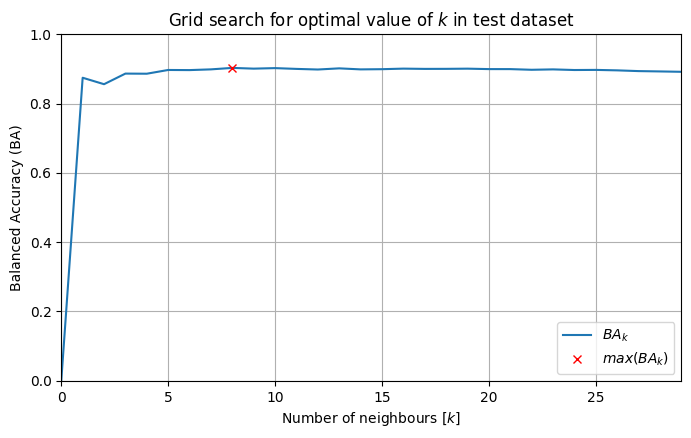

In [7]:
#k, ba = knn.findBestK(x=X_test,Y=Y_data,y_label=y_test,classes_rate=classes_rate_test)

n = np.linspace(0,29,30)


plt.figure(figsize=(8,4.5))
plt.plot(n,ba,label=f'$BA_k$')
plt.plot(k,max(ba),'xr',label=f'$max(BA_k)$',linewidth=5)
plt.xlabel(f'Number of neighbours [$k$]')
plt.ylabel('Balanced Accuracy (BA)')
plt.title(f'Grid search for optimal value of $k$ in test dataset')
plt.legend(loc='lower right')
plt.grid()
plt.xlim([0, 29])
plt.ylim([0, 1])

plt.savefig('../plot/knn_1/grid_search.pdf', format="pdf", bbox_inches="tight")

print(k)
print(max(ba))